<a href="https://colab.research.google.com/github/laluwisnu/ML-peroject-/blob/main/final_project_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Membaca file dataset berita ekonomi nasional
df = pd.read_csv("/content/dataset penelitian.csv")

print("===== 5 Data Teratas =====")
print(df.head())

print("\n===== Informasi Dataset =====")
print(df.info())

print("\n===== Jumlah Missing Value Tiap Kolom =====")
print(df.isnull().sum())

print("\n===== Jumlah Data Duplikat =====")
print(df.duplicated().sum())

===== 5 Data Teratas =====
      Tanggal                                              Judul      Media  \
0  10/25/2024  Integrasikan Teknologi, PGN Menuju Transformas...  Liputan 6   
1  10/26/2024  Menakar Kondisi Ekonomi Indonesia 2025 di Bawa...     Kompas   
2  10/26/2024              Apa Itu Mata Uang BRICS dan Tujuannya     ANTARA   
3  10/26/2024  Pengertian dan fungsi Danantara hingga manfaat...     ANTARA   
4  10/27/2024  Melihat Potensi Dampak Ekonomi Indonesia Gabun...     Kompas   

                                    Kategori  \
0                     Energi / Ekonomi Hijau   
1                                    Ekonomi   
2        Ekonomi Global / Integrasi Keuangan   
3  Ekonomi Makro / Fiskal & Investasi Negara   
4                      Ekonomi Internasional   

                                                Link  \
0  https://www.liputan6.com/bisnis/read/5759980/i...   
1  https://money.kompas.com/read/2024/10/26/20470...   
2  https://www.antaranews.com/berita/4424

Tahap 2: Pembersihan Data (Light Text Preprocessing)

In [ ]:
import pandas as pd
import re

# Membaca dataset awal hasil scraping
df = pd.read_csv("/content/dataset penelitian.csv")

print("===== INFORMASI DATASET AWAL =====")
print("Jumlah data awal:", len(df))
print("Jumlah missing value:", df['Interpretasi singkat'].isnull().sum())
print("Jumlah duplikasi:", df.duplicated(subset=['Interpretasi singkat']).sum())
print("\nContoh 3 data awal sebelum pembersihan:\n")
print(df['Interpretasi singkat'].head(3))


# ===============================
# Fungsi CLEANING yang lebih optimal
# ===============================
def clean_text(text):

    text = str(text).lower()

    # Hapus HTML tag
    text = re.sub(r"<.*?>", "", text)

    # Hapus URL
    text = re.sub(r"http\S+|www\S+", "", text)

    # Hapus mention & hashtag
    text = re.sub(r"[@#]\w+", "", text)

    # Hapus angka berlebihan (tanggal, angka 8 digit, dll)
    text = re.sub(r"\b\d{2,}\b", " ", text)

    # Hapus karakter yang tidak perlu tetapi pertahankan . , ! ? %
    text = re.sub(r"[^a-zA-Z0-9\s.,!?%]", " ", text)

    # Menghilangkan spasi berlebih
    text = re.sub(r"\s+", " ", text).strip()

    return text


# 1. Hapus missing value & duplikasi
df = df.dropna(subset=['Interpretasi singkat'])
df = df.drop_duplicates(subset=['Interpretasi singkat'])
df = df.reset_index(drop=True)

# 2. Buat kolom teks bersih BARU
df['clean_text'] = df['Interpretasi singkat'].apply(clean_text)


print("\n===== INFORMASI SETELAH PEMBERSIHAN =====")
print("Jumlah data sesudah pembersihan:", len(df))
print("Jumlah missing value:", df['clean_text'].isnull().sum())
print("Jumlah duplikasi:", df.duplicated(subset=['clean_text']).sum())

print("\n===== 3 DATA TERATAS SETELAH PEMBERSIHAN =====")
print(df['clean_text'].head(3))

output_path = "berita_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\n Dataset hasil pembersihan disimpan ke: {output_path}")


===== INFORMASI DATASET AWAL =====
Jumlah data awal: 1002
Jumlah missing value: 1
Jumlah duplikasi: 0

Contoh 3 data awal sebelum pembersihan:

0    PGN mendorong transformasi menuju ekonomi hija...
1    Berita membahas proyeksi ekonomi Indonesia di ...
2    Artikel menjelaskan konsep dan tujuan mata uan...
Name: Interpretasi singkat, dtype: object

===== INFORMASI SETELAH PEMBERSIHAN =====
Jumlah data sesudah pembersihan: 1001
Jumlah missing value: 0
Jumlah duplikasi: 0

===== 3 DATA TERATAS SETELAH PEMBERSIHAN =====
0    pgn mendorong transformasi menuju ekonomi hija...
1    berita membahas proyeksi ekonomi indonesia di ...
2    artikel menjelaskan konsep dan tujuan mata uan...
Name: clean_text, dtype: object

 Dataset hasil pembersihan disimpan ke: berita_cleaned.csv



# Tahap 3: Pelabelan Otomatis (Lexicon-Based Sentiment)

In [ ]:

import pandas as pd

# Membaca dataset hasil pembersihan
df = pd.read_csv("/content/berita_cleaned.csv")

# Menentukan nama kolom teks utama
text_col = 'Interpretasi singkat'

# Daftar kata positif dan negatif sederhana
kata_positif = ["naik", "tumbuh", "meningkat", "sukses", "baik", "stabil", "membaik", "pulih", "kuat", "positif"]
kata_negatif = ["turun", "krisis", "melemah", "buruk", "negatif", "defisit", "rugi", "masalah", "utang", "inflasi"]

# Fungsi untuk menentukan sentimen
def label_sentimen(teks):
    teks = str(teks).lower()
    skor = sum(k in teks for k in kata_positif) - sum(k in teks for k in kata_negatif)
    if skor > 0:
        return "positif"
    elif skor < 0:
        return "negatif"
    else:
        return "netral"

# Terapkan fungsi ke seluruh data
df["label"] = df[text_col].apply(label_sentimen)

# Simpan dataset hasil labeling
df.to_csv("/content/berita_prabowo_labeled.csv", index=False)

# Tampilkan 10 data pertama
print("===== Contoh 10 Data Setelah Labeling =====")
print(df[[text_col, "label"]].head(10))


===== Contoh 10 Data Setelah Labeling =====
                                Interpretasi singkat    label
0  PGN mendorong transformasi menuju ekonomi hija...   netral
1  Berita membahas proyeksi ekonomi Indonesia di ...  positif
2  Artikel menjelaskan konsep dan tujuan mata uan...   netral
3  Pemerintah meluncurkan Danantara (Daya Anagata...  positif
4  Membahas dampak bergabungnya Indonesia ke BRIC...  positif
5  Tulisan opini yang menyoroti tren positif ekon...  positif
6  Pemerintah menilai target pertumbuhan 8% reali...  positif
7  Pemberitaan mengenai langkah koordinatif Prabo...  positif
8  BPS mencatat pertumbuhan ekonomi 4,95 persen, ...  positif
9  Pemerintah menempatkan UMKM sebagai tulang pun...  positif


# Tahap 5: Tokenisasi Menggunakan IndoBERT

In [ ]:


from transformers import AutoTokenizer
import pandas as pd

#  Membaca dataset hasil split
train_df = pd.read_csv("/content/train_dataset.csv")
test_df = pd.read_csv("/content/test_dataset.csv")

#  Inisialisasi tokenizer IndoBERT
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")

#  Menampilkan contoh 5 data teratas sebelum tokenisasi
print("===== Contoh 5 Data Sebelum Tokenisasi =====")
print(train_df[['Interpretasi singkat', 'label']].head())

#  Melakukan tokenisasi pada kolom teks
train_encodings = tokenizer(
    train_df["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

test_encodings = tokenizer(
    test_df["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

#  Menampilkan hasil tokenisasi untuk 5 data pertama
print("\n===== Contoh Hasil Tokenisasi (5 Data Teratas) =====")
for i in range(5):
    text_asli = train_df["Interpretasi singkat"].iloc[i]
    tokens = tokenizer.tokenize(text_asli)
    print(f"Teks {i+1}: {text_asli}")
    print(f"Token: {tokens[:15]}...")
    print("-" * 100)

#  Menyimpan hasil tokenisasi (opsional)
import torch

torch.save(train_encodings, "/content/train_encodings.pt")
torch.save(test_encodings, "/content/test_encodings.pt")

print("\n📁 Hasil tokenisasi disimpan sebagai file tensor (.pt)")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

===== Contoh 5 Data Sebelum Tokenisasi =====
                                Interpretasi singkat    label
0  Berita prediksi optimistik untuk negara asing;...   netral
1  Evaluasi hasil satu tahun kepemimpinan Prabowo...   netral
2  Nada netral, berfokus pada stabilitas ekonomi ...  positif
3  Berita ini menyoroti pernyataan Prabowo yang m...  positif
4  Nada negatif, menyoroti ancaman ketergantungan...   netral

===== Contoh Hasil Tokenisasi (5 Data Teratas) =====
Teks 1: Berita prediksi optimistik untuk negara asing; bisa dibandingkan dengan realitas nasional yang lebih rendah.
Token: ['berita', 'prediksi', 'optimis', '##tik', 'untuk', 'negara', 'asing', ';', 'bisa', 'dibandingkan', 'dengan', 'realitas', 'nasional', 'yang', 'lebih']...
----------------------------------------------------------------------------------------------------
Teks 2: Evaluasi hasil satu tahun kepemimpinan Prabowo dan Gibran — lembaga CELIOS menyoroti performa yang dinilai rendah dalam aspek ekonomi atau tat

# EKSTRAKSI FITUR KLASIK

Shape BoW: (1001, 2001)
Shape TF-IDF: (1001, 2001)
Shape TF-IDF Ngram: (1001, 7000)

===== 20 Kata Terbanyak (BoW) =====
             word  count
414       ekonomi    715
272           dan    555
1249         nada    456
1534      positif    292
1497  pertumbuhan    224
1997         yang    218
1373   pemerintah    213
1866     terhadap    207
679     kebijakan    162
1186    menyoroti    159
563     indonesia    156
1254     nasional    148
309            di    148
172        berita    125
1958        untuk    124
1305         pada    108
1161  menunjukkan    106
268         dalam    105
489        global     94
600     investasi     94


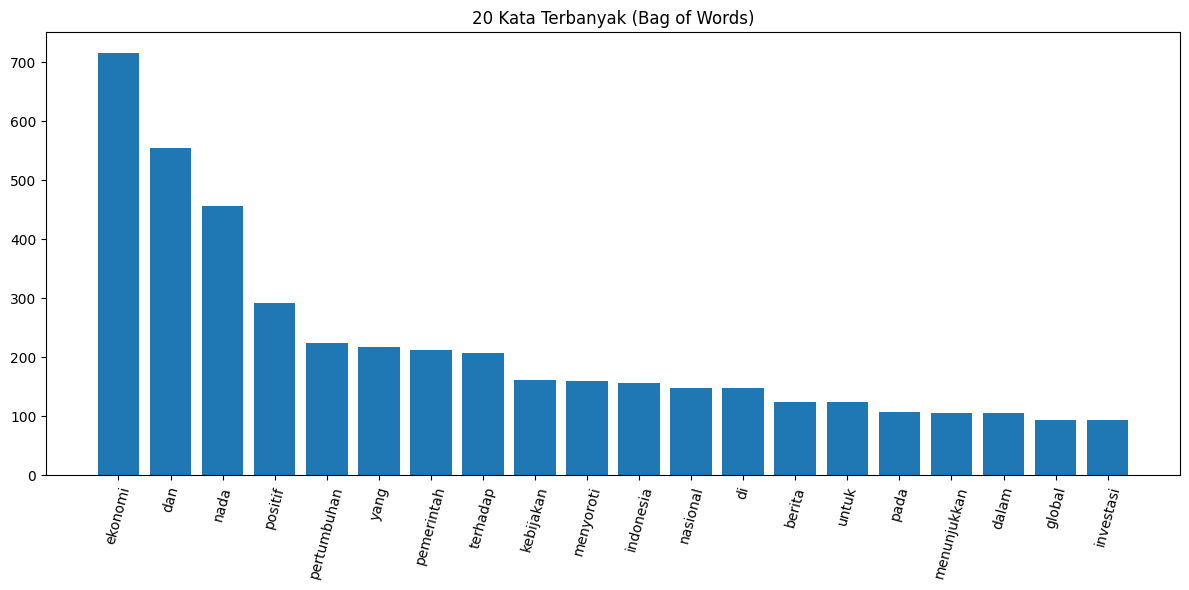

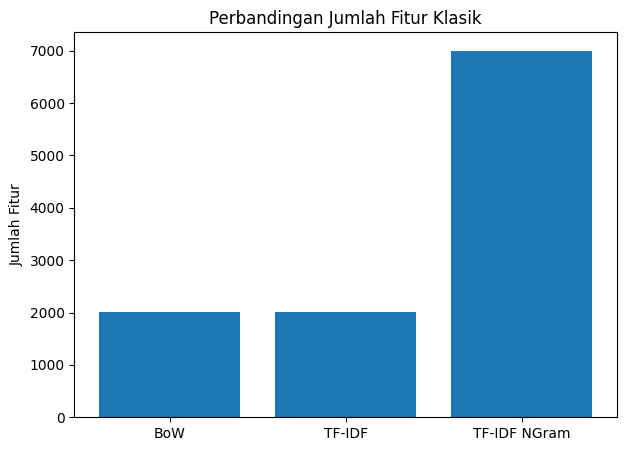


=== Visualisasi Fitur Klasik selesai ===


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pastikan df['clean_text'] ada
texts = df['clean_text'].astype(str)

# 1. Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000)
bow_features = bow_vectorizer.fit_transform(texts)
print("Shape BoW:", bow_features.shape)

# 2. TF-IDF Unigram
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(texts)
print("Shape TF-IDF:", tfidf_features.shape)

# 3. TF-IDF + N-gram (Unigram + Bigram)
tfidf_ngram_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=7000)
tfidf_ngram_features = tfidf_ngram_vectorizer.fit_transform(texts)
print("Shape TF-IDF Ngram:", tfidf_ngram_features.shape)

#  VISUALISASI FITUR KLASIK

# --- 1. TABEL 20 Kata Terbanyak (BoW) ---
word_counts = bow_features.sum(axis=0).A1
vocab = bow_vectorizer.get_feature_names_out()
freq_df = pd.DataFrame({'word': vocab, 'count': word_counts})
freq_df = freq_df.sort_values(by='count', ascending=False)

print("\n===== 20 Kata Terbanyak (BoW) =====")
print(freq_df.head(20))

# --- 2. Bar Chart (Top 20 BoW Words) ---
plt.figure(figsize=(12,6))
plt.bar(freq_df['word'].head(20), freq_df['count'].head(20))
plt.title("20 Kata Terbanyak (Bag of Words)")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

# --- 3. Perbandingan Dimensi Fitur ---
plt.figure(figsize=(7,5))
plt.bar(['BoW', 'TF-IDF', 'TF-IDF NGram'],
        [bow_features.shape[1], tfidf_features.shape[1], tfidf_ngram_features.shape[1]])

plt.title("Perbandingan Jumlah Fitur Klasik")
plt.ylabel("Jumlah Fitur")
plt.show()

print("\n=== Visualisasi Fitur Klasik selesai ===")

# Membagi dataset menjadi train (80%) dan test (20%)

In [ ]:
from sklearn.model_selection import train_test_split

# X = teks bersih
X = df['clean_text'].astype(str)

# y = label (ubah ke angka)
label2id = {"negatif":0, "netral":1, "positif":2}
df['label_id'] = df['label'].map(label2id)

y = df['label_id'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data training:", len(X_train))
print("Data testing :", len(X_test))


Data training: 800
Data testing : 201


# cnn

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report


max_words = 10000
max_len = 200

tokenizer_dl = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer_dl.fit_on_texts(X_train)

X_train_seq = tokenizer_dl.texts_to_sequences(X_train)
X_test_seq = tokenizer_dl.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# MODEL CNN
model_cnn = models.Sequential([
    layers.Embedding(max_words, 128, input_length=max_len),
    layers.Conv1D(128, 5, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(128, 5, activation='relu'),
    layers.GlobalMaxPooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # ubah jika kelas >2
])

model_cnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_cnn.summary()

# Training
cnn_history = model_cnn.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32
)

# Prediksi & laporan
y_pred_cnn = (model_cnn.predict(X_test_pad) > 0.5).astype("int32")
print("\n=== CNN Classification Report ===")
print(classification_report(y_test, y_pred_cnn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.3196 - loss: -3.1579 - val_accuracy: 0.3562 - val_loss: -92.7673
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.3216 - loss: -397.7109 - val_accuracy: 0.3562 - val_loss: -3712.3601
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.3478 - loss: -8480.5234 - val_accuracy: 0.3562 - val_loss: -43457.0625
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.3527 - loss: -77752.1328 - val_accuracy: 0.3562 - val_loss: -298949.8438
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.3520 - loss: -422135.6250 - val_accuracy: 0.3562 - val_loss: -1324983.6250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

=== CNN Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.36      1.00      0.53        72
           2       0.00      0.00      0.00       111

    accuracy                   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#lstm

In [ ]:
model_lstm = models.Sequential([
    layers.Embedding(max_words, 128, input_length=max_len),
    layers.LSTM(128, return_sequences=False),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_lstm.summary()

# Training
lstm_history = model_lstm.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32
)

# Prediksi & laporan
y_pred_lstm = (model_lstm.predict(X_test_pad) > 0.5).astype("int32")
print("\n=== LSTM Classification Report ===")
print(classification_report(y_test, y_pred_lstm))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 287ms/step - accuracy: 0.3234 - loss: -0.2502 - val_accuracy: 0.3562 - val_loss: -5.8805
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 371ms/step - accuracy: 0.3615 - loss: -7.9132 - val_accuracy: 0.3562 - val_loss: -16.2135
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 305ms/step - accuracy: 0.3537 - loss: -17.4341 - val_accuracy: 0.3562 - val_loss: -28.1327
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 335ms/step - accuracy: 0.3473 - loss: -27.9014 - val_accuracy: 0.3562 - val_loss: -43.2699
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.3474 - loss: -44.4601 - val_accuracy: 0.3562 - val_loss: -61.6162
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step

=== LSTM Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.36      1.00      0.53        72
           2       0.00      0.00      0.00       111

    accuracy                           0.36       201


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 # Tahap Pretraining Fine-Tuning IndoBERT untuk Analisis Sentimen

In [ ]:


from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd

# 1. Membaca dataset train dan test
train_df = pd.read_csv("/content/train_dataset.csv")
test_df = pd.read_csv("/content/test_dataset.csv")

# 2. Membersihkan dan menstandarkan label
def clean_label(label):
    label = str(label).strip().lower()
    if "positif" in label:
        return "positif"
    elif "negatif" in label:
        return "negatif"
    elif "netral" in label:
        return "netral"
    else:
        return "netral"

train_df["label"] = train_df["label"].apply(clean_label)
test_df["label"] = test_df["label"].apply(clean_label)

print("Label unik TRAIN:", train_df["label"].unique())
print("Label unik TEST :", test_df["label"].unique())

# 3. Mapping label teks ke angka (langsung di DataFrame)
label2id = {"negatif": 0, "netral": 1, "positif": 2}
id2label = {0: "negatif", 1: "netral", 2: "positif"} # Add this line to define id2label
train_df["label_id"] = train_df["label"].map(label2id)
test_df["label_id"] = test_df["label"].map(label2id)

# 4. Inisialisasi tokenizer dan model IndoBERT
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p1")
model = AutoModelForSequenceClassification.from_pretrained(
    "indobenchmark/indobert-base-p1",
    num_labels=3,
    id2label=id2label, # Pass the id2label mapping to the model
    label2id=label2id # Pass the label2id mapping to the model
)

# 5. Tokenisasi teks
def tokenize_function(batch):
    return tokenizer(batch["Interpretasi singkat"], truncation=True, padding="max_length", max_length=128)

train_dataset = Dataset.from_pandas(train_df[["Interpretasi singkat", "label_id"]])
test_dataset = Dataset.from_pandas(test_df[["Interpretasi singkat", "label_id"]])

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# 6. Format untuk PyTorch
train_dataset = train_dataset.rename_column("label_id", "labels")
test_dataset = test_dataset.rename_column("label_id", "labels")

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

# 7. Pengaturan parameter training
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch", # Changed from evaluation_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=50,
    report_to="none"  # menonaktifkan Weights & Biases
)

# 8. Fungsi evaluasi
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# 9. Inisialisasi Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# 10. Jalankan fine-tuning
trainer.train()

# 11. Evaluasi hasil
results = trainer.evaluate()
print("\n===== HASIL EVALUASI INDOBERT =====")
print(results)

# === Tambahan: Tabel hasil evaluasi ===
import pandas as pd
from IPython.display import display

results_df = pd.DataFrame([results])
print("\n📊 TABEL HASIL EVALUASI")
display(results_df)

# 12. Simpan model hasil training
model.save_pretrained("/content/indobert_finetuned")
tokenizer.save_pretrained("/content/indobert_finetuned")

print("\n📁 Model hasil fine-tuning disimpan ke folder: /content/indobert_finetuned")

Label unik TRAIN: ['netral' 'positif' 'negatif']
Label unik TEST : ['positif' 'netral' 'negatif']


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/201 [00:00<?, ? examples/s]

/tmp/ipython-input-1911801040.py:88: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.387200,0.326233,0.885572,0.888260,0.885572,0.883017
2,0.182600,0.262022,0.935323,0.936757,0.935323,0.935804
3,0.076100,0.241372,0.940299,0.940299,0.940299,0.940299


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



===== HASIL EVALUASI INDOBERT =====
{'eval_loss': 0.2413719892501831, 'eval_accuracy': 0.9402985074626866, 'eval_precision': 0.9402985074626866, 'eval_recall': 0.9402985074626866, 'eval_f1': 0.9402985074626866, 'eval_runtime': 70.8755, 'eval_samples_per_second': 2.836, 'eval_steps_per_second': 0.367, 'epoch': 3.0}

📊 TABEL HASIL EVALUASI


,eval_loss,eval_accuracy,eval_precision,eval_recall,eval_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,0.241372,0.940299,0.940299,0.940299,0.940299,70.8755,2.836,0.367,3.0



📁 Model hasil fine-tuning disimpan ke folder: /content/indobert_finetuned


# Tahap 7: Error Analysis (Analisis Kesalahan)


===== Contoh Hasil Prediksi =====
                                Interpretasi singkat    label predicted_label
0  Memberitakan capaian ekonomi digital Indonesia...  positif         positif
1  Bank Indonesia menekankan bahwa kombinasi kebi...  positif         positif
2  Kolom yang mengangkat penguatan ekonomi keraky...  positif         positif
3  Nada positif, menunjukkan optimisme terhadap s...  positif         positif
4  Pemerintah merencanakan melanjutkan stimulus e...   netral          netral
5  Gejolak ekonomi global menimbulkan ketidakpast...   netral          netral
6  Pernyataan optimistis Presiden Prabowo soal ta...  positif         positif
7  Prediksi dari bank sentral Indonesia — angka l...  positif         positif
8  Artikel ini menyoroti potensi bahaya deflasi t...   netral          netral
9  Berita kebijakan sosial dengan nada netral–kri...   netral          netral


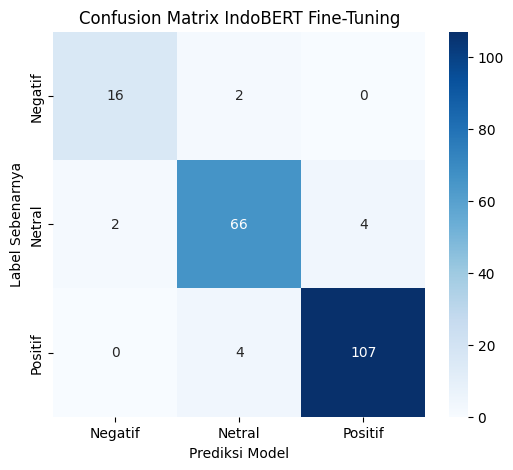


===== Laporan Klasifikasi =====
              precision    recall  f1-score   support

     negatif       0.89      0.89      0.89        18
      netral       0.92      0.92      0.92        72
     positif       0.96      0.96      0.96       111

    accuracy                           0.94       201
   macro avg       0.92      0.92      0.92       201
weighted avg       0.94      0.94      0.94       201



In [ ]:


import pandas as pd
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 1. Muat model hasil fine-tuning
model_path = "/content/indobert_finetuned"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# 2. Baca dataset uji
test_df = pd.read_csv("/content/test_dataset.csv")

# 3. Tokenisasi data uji
test_encodings = tokenizer(
    test_df["Interpretasi singkat"].tolist(),
    truncation=True,
    padding=True,
    max_length=128,
    return_tensors='pt'
)

# 4. Prediksi label oleh model
model.eval()
with torch.no_grad():
    outputs = model(**test_encodings)
    predictions = torch.argmax(outputs.logits, dim=1).numpy()

# 5. Mapping label angka ke teks
id2label = {0: "negatif", 1: "netral", 2: "positif"}
predicted_labels = [id2label[p] for p in predictions]

# 6. Gabungkan hasil ke DataFrame
test_df["predicted_label"] = predicted_labels

# 7. Tampilkan 10 hasil prediksi pertama
print("\n===== Contoh Hasil Prediksi =====")
print(test_df[["Interpretasi singkat", "label", "predicted_label"]].head(10))

# 8. Buat confusion matrix
cm = confusion_matrix(test_df["label"], test_df["predicted_label"], labels=["negatif", "netral", "positif"])

# 9. Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Negatif", "Netral", "Positif"],
            yticklabels=["Negatif", "Netral", "Positif"])
plt.xlabel("Prediksi Model")
plt.ylabel("Label Sebenarnya")
plt.title("Confusion Matrix IndoBERT Fine-Tuning")
plt.show()

# 10. Laporan klasifikasi
print("\n===== Laporan Klasifikasi =====")
print(classification_report(test_df["label"], test_df["predicted_label"]))


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd


# 1. Load model IndoBERT hasil fine-tuning (TIDAK PERLU TRAIN ULANG)
model_path = "/content/indobert_finetuned"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# 3. Fungsi prediksi
def predict_label(text):
    if pd.isna(text) or text.strip() == "":
        return "Undefined"

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model(**inputs)
    probs = outputs.logits.softmax(dim=-1)
    label_id = torch.argmax(probs).item()

    return model.config.id2label[label_id]

# 4. Prediksi sentimen
df["predicted_label"] = df["Interpretasi singkat"].apply(predict_label)

df[["Interpretasi singkat", "predicted_label"]].head(20)


,Interpretasi singkat,predicted_label
0,PGN mendorong transformasi menuju ekonomi hija...,netral
1,Berita membahas proyeksi ekonomi Indonesia di ...,positif
2,Artikel menjelaskan konsep dan tujuan mata uan...,netral
3,Pemerintah meluncurkan Danantara (Daya Anagata...,positif
4,Membahas dampak bergabungnya Indonesia ke BRIC...,positif
5,Tulisan opini yang menyoroti tren positif ekon...,positif
6,Pemerintah menilai target pertumbuhan 8% reali...,positif
7,Pemberitaan mengenai langkah koordinatif Prabo...,positif
8,"BPS mencatat pertumbuhan ekonomi 4,95 persen, ...",positif
9,Pemerintah menempatkan UMKM sebagai tulang pun...,positif


In [ ]:
print(df["predicted_label"].value_counts())


predicted_label
positif    556
netral     352
negatif     93
Name: count, dtype: int64


In [ ]:
df["Tanggal"] = pd.to_datetime(df["Tanggal"], errors="coerce")
df["Bulan"] = df["Tanggal"].dt.to_period("M").astype(str)

print(df[["Tanggal", "Bulan", "predicted_label"]].head())


     Tanggal    Bulan predicted_label
0 2024-10-25  2024-10          netral
1 2024-10-26  2024-10         positif
2 2024-10-26  2024-10          netral
3 2024-10-26  2024-10         positif
4 2024-10-27  2024-10         positif


In [ ]:
sentimen_bulanan = df.groupby(["Bulan", "predicted_label"]).size().unstack(fill_value=0)

print("===== Jumlah Sentimen Per Bulan =====")
print(sentimen_bulanan)


===== Jumlah Sentimen Per Bulan =====
predicted_label  negatif  netral  positif
Bulan                                    
2024-10                0       2        5
2024-11                0       4       12
2024-12                2       5       12
2025-01                1       5       22
2025-02                4      10       32
2025-03               10      14       18
2025-04                2      16       13
2025-05                7      27       49
2025-06               10      24       37
2025-07                6      32       30
2025-08               13      38      116
2025-09               24      55       81
2025-10               14     120      129


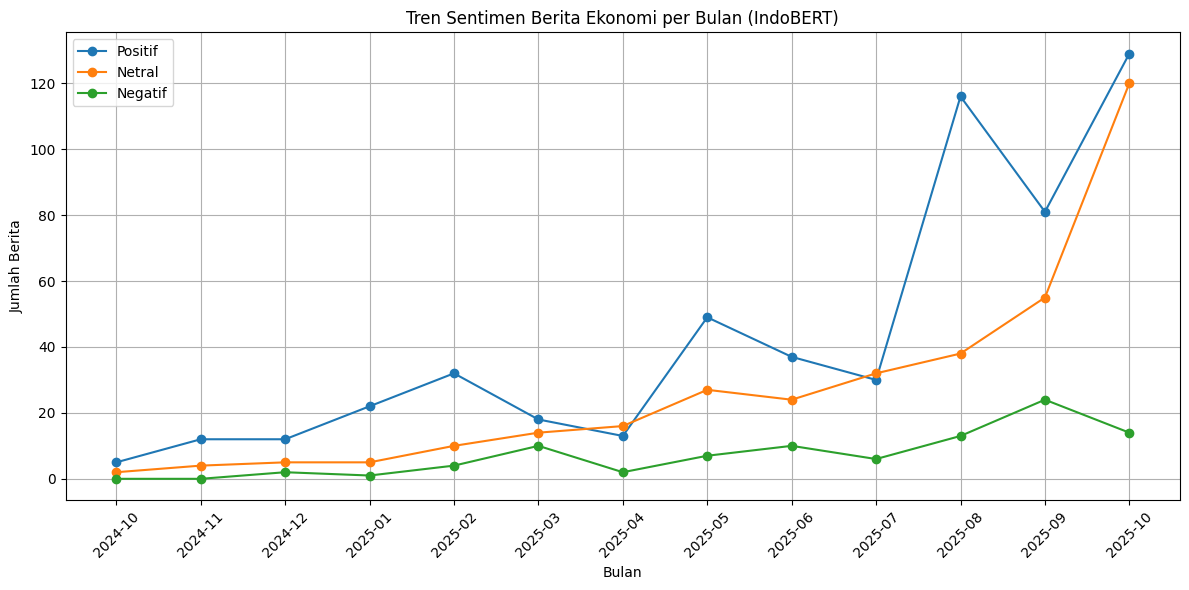

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sentimen_bulanan.index, sentimen_bulanan["positif"], marker="o")
plt.plot(sentimen_bulanan.index, sentimen_bulanan["netral"], marker="o")
plt.plot(sentimen_bulanan.index, sentimen_bulanan["negatif"], marker="o")

plt.title("Tren Sentimen Berita Ekonomi per Bulan (IndoBERT)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.legend(["Positif", "Netral", "Negatif"])
plt.grid(True)
plt.tight_layout()
plt.show()


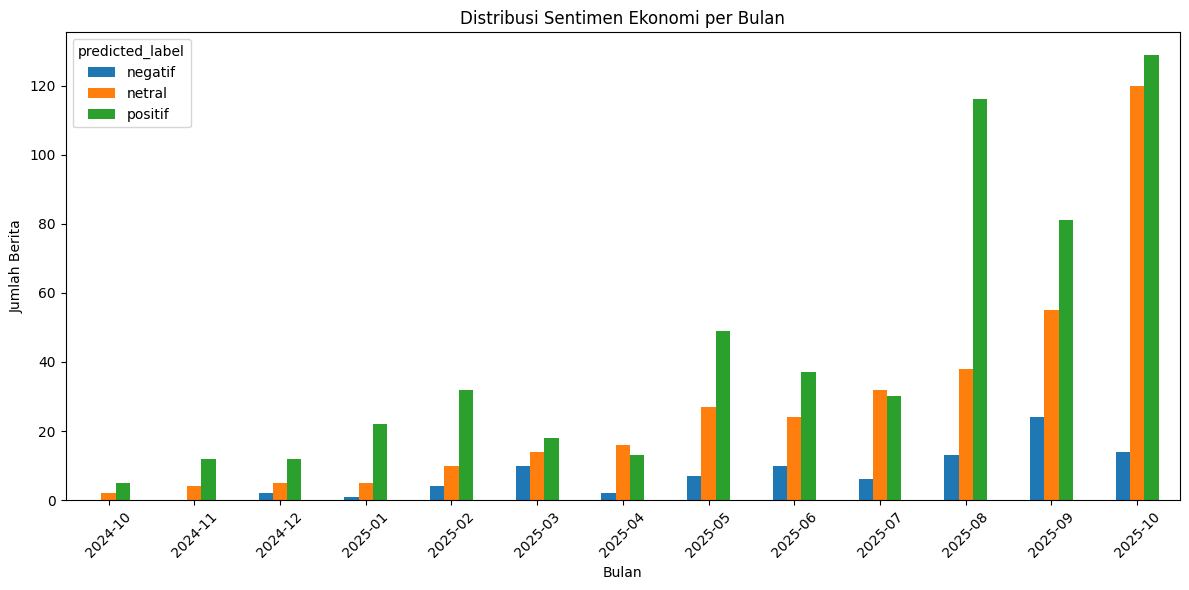

In [ ]:
sentimen_bulanan.plot(kind="bar", figsize=(12,6))

plt.title("Distribusi Sentimen Ekonomi per Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Berita")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
